Date Created: Apr 6, 2022 @ 11:47 mst

---

# **Overview:**


The notebook is outlined as follows:

    Part 1: Lorenz System
        
    Part 2: Chen System
    
    Part 3: Genesio system
    
    Part 4: Hyperchaotic Rossler system
    
    Part 5: Coupled Data 
    
    Links
    
    References 


In [1]:
import matplotlib.animation as animation
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from numpy import linalg as LA

%matplotlib notebook 

---

# **Part 1: Lorenz System**

Summary: 3D model of the Lorenz ODE system approximated usingcthe 4th-order Runge-Kutta method.

---

In [2]:
def RK4(t, x, y, z, equation_1, equation_2, equation_3, dt):

    k1[0] = dt*equation_1(t, x, y, z)
    k1[1] = dt*equation_2(t, x, y, z)
    k1[2] = dt*equation_3(t, x, y, z)

    k2[0] = dt*equation_1(t + dt/2., x + k1[0]/2., y + k1[1]/2., z + k1[2]/2.)
    k2[1] = dt*equation_2(t + dt/2., x + k1[0]/2., y + k1[1]/2., z + k1[2]/2.)
    k2[2] = dt*equation_3(t + dt/2., x + k1[0]/2., y + k1[1]/2., z + k1[2]/2.)

    k3[0] = dt*equation_1(t + dt/2., x + k2[0]/2., y + k2[1]/2., z + k2[2]/2.)
    k3[1] = dt*equation_2(t + dt/2., x + k2[0]/2., y + k2[1]/2., z + k2[2]/2.)
    k3[2] = dt*equation_3(t + dt/2., x + k2[0]/2., y + k2[1]/2., z + k2[2]/2.)

    k4[0] = dt*equation_1(t + dt, x + k3[0], y + k3[1], z + k3[2])
    k4[1] = dt*equation_2(t + dt, x + k3[0], y + k3[1], z + k3[2])
    k4[2] = dt*equation_3(t + dt, x + k3[0], y + k3[1], z + k3[2])

    x = x + (1./6.)*(k1[0] + 2.*k2[0] + 2.*k3[0] + k4[0])
    y = y + (1./6.)*(k1[1] + 2.*k2[1] + 2.*k3[1] + k4[1])
    z = z + (1./6.)*(k1[2] + 2.*k2[2] + 2.*k3[2] + k4[2])

    return np.array([x, y, z, t])

In [3]:
x = 1
y = 2
z = 3


t0 = 0.
tf = 100.
dt = 0.01
tmax = 100.
vector_t = np.arange(t0, tmax, dt) # time scale
n = len(vector_t)

rho = 28.  # check wiki page for info of rho depencancy/interesting values
sigma = 10.
beta = 8./3.


k1 = np.array([0., 0., 0.])
k2 = np.array([0., 0., 0.])
k3 = np.array([0., 0., 0.])
k4 = np.array([0., 0., 0.])


def equation_1(t, x, y, z):
    return sigma*(y - x)


def equation_2(t, x, y, z):
    return rho*x - y - x*z


def equation_3(t, x, y, z):
    return x*y - beta*z

#### Collecting Data

In [4]:
rk4_data_lorenz = np.zeros((n, 4)) # setting initial conditions
rk4_data_lorenz[0, 0] = x
rk4_data_lorenz[0, 1] = y
rk4_data_lorenz[0, 2] = z
rk4_data_lorenz[0, 3] = vector_t[0]


for i in range(n-1): # loop the stages over i
    rk4_data_lorenz[i+1, :] = RK4(vector_t[i], rk4_data_lorenz[i, 0], rk4_data_lorenz[i, 1],
                       rk4_data_lorenz[i, 2], equation_1, equation_2, equation_3, dt)

    
print(rk4_data_lorenz[:10, :])

[[1.         2.         3.         0.        ]
 [1.10668018 2.24217232 2.94309092 0.        ]
 [1.22751058 2.51086379 2.89299937 0.01      ]
 [1.36383363 2.80953945 2.85086486 0.02      ]
 [1.51720808 3.14196668 2.81812275 0.03      ]
 [1.6894189  3.51224936 2.79657619 0.04      ]
 [1.88248919 3.92485658 2.78848524 0.05      ]
 [2.09869337 4.38464332 2.79667659 0.06      ]
 [2.34057049 4.8968588  2.82467831 0.07      ]
 [2.61093629 5.46713654 2.87688393 0.08      ]]


#### Plots

<IPython.core.display.Javascript object>


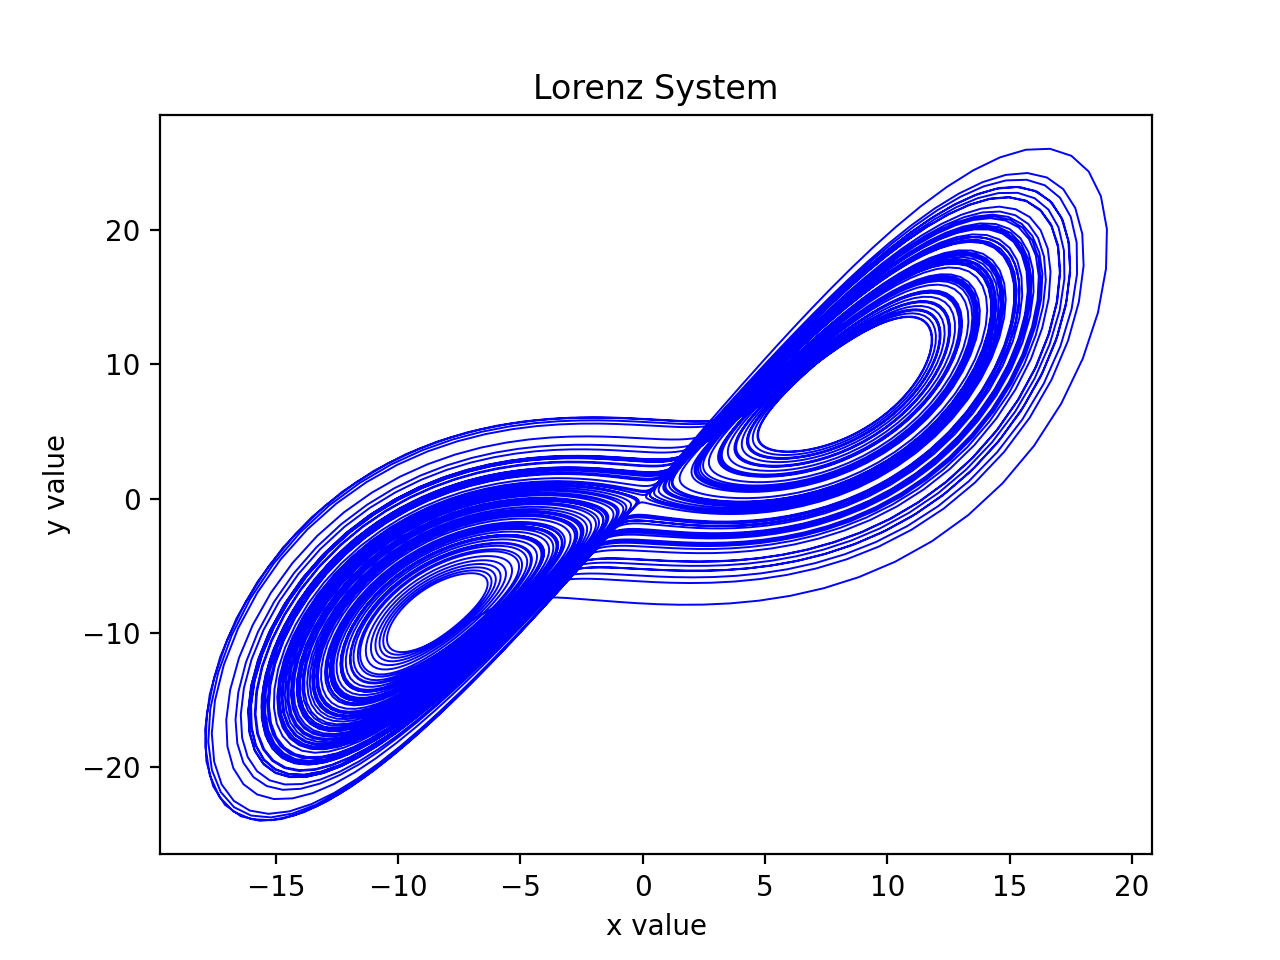

<IPython.core.display.Javascript object>


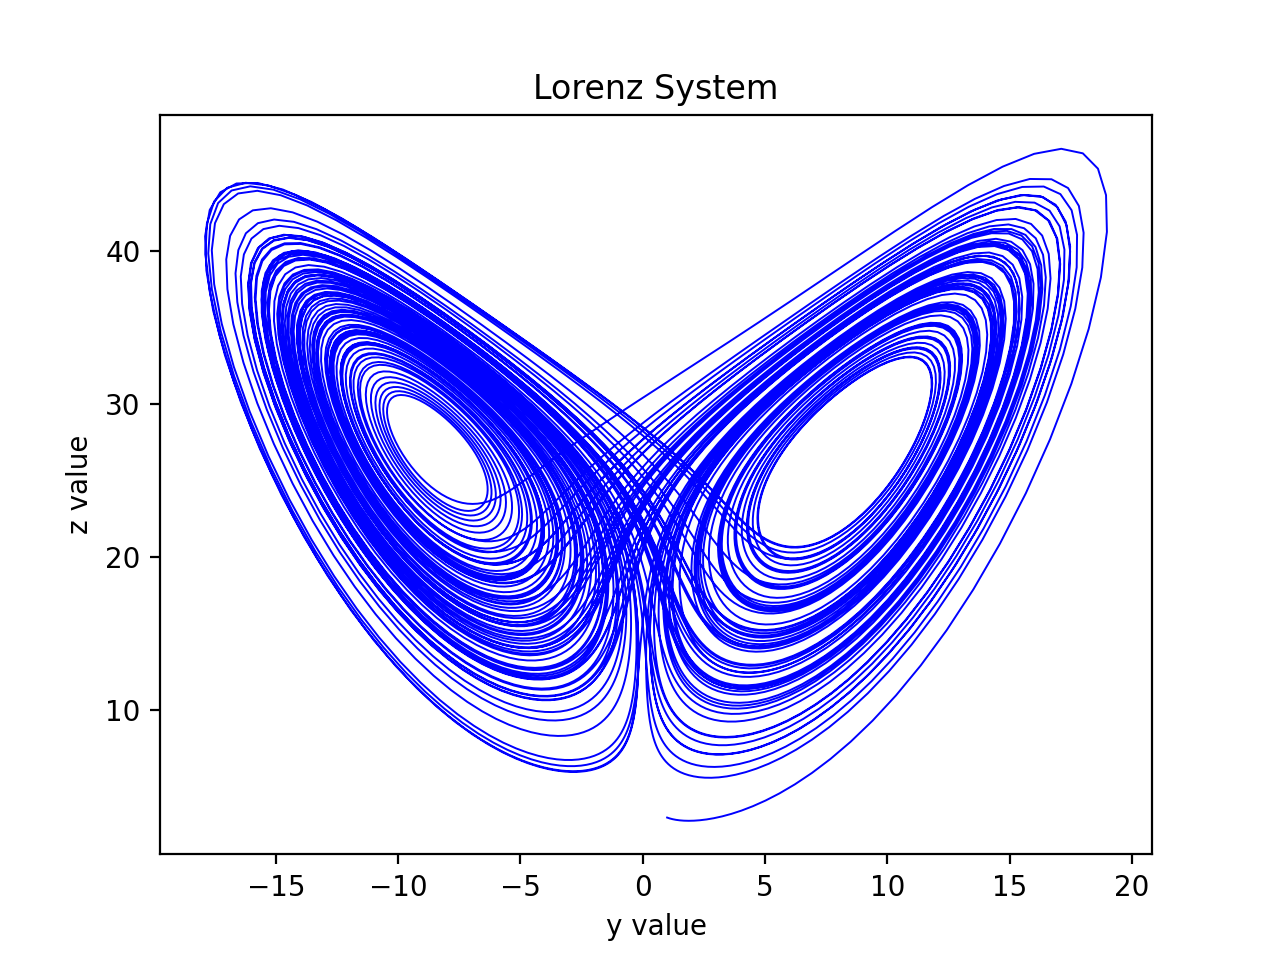

<IPython.core.display.Javascript object>


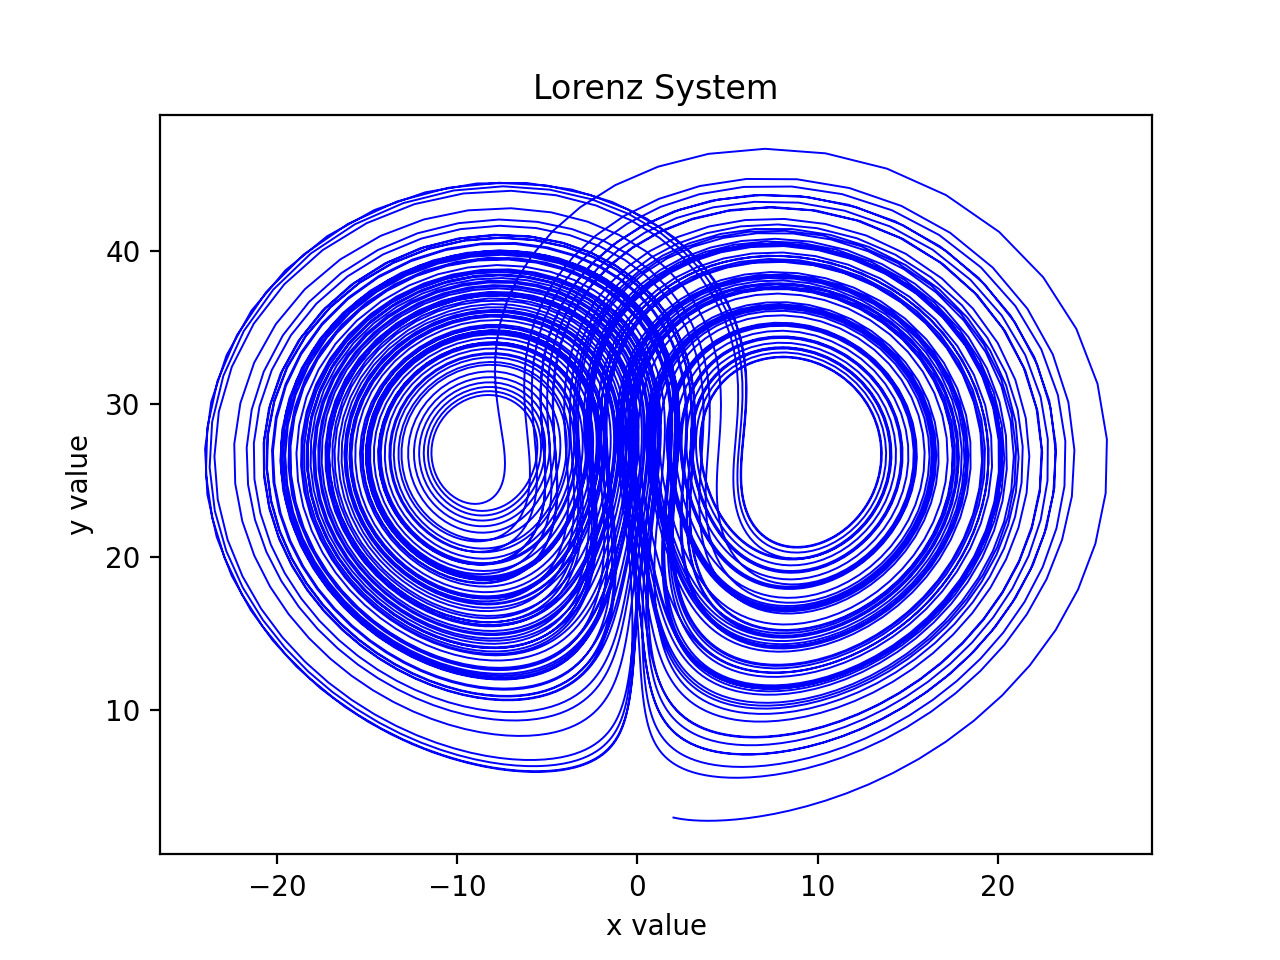

In [5]:
plt.figure() 
plt.title("Lorenz System")
plt.ylabel('y value')
plt.xlabel('x value')
plt.plot(rk4_data_lorenz[:i, 0], rk4_data_lorenz[:i, 1], color='b', label='y vs. z', linewidth='0.7')
plt.show() 

plt.figure()
plt.title("Lorenz System")
plt.ylabel('z value')
plt.xlabel('y value')
plt.plot(rk4_data_lorenz[:i, 0], rk4_data_lorenz[:i, 2], color='b', label='y vs. z', linewidth='0.7')
plt.show()


plt.figure()
plt.title("Lorenz System")
plt.ylabel('y value')
plt.xlabel('x value')
plt.plot(rk4_data_lorenz[:i, 1], rk4_data_lorenz[:i, 2], color='b', label='y vs. z', linewidth='0.7')
plt.show() 

#### Subplots

<IPython.core.display.Javascript object>


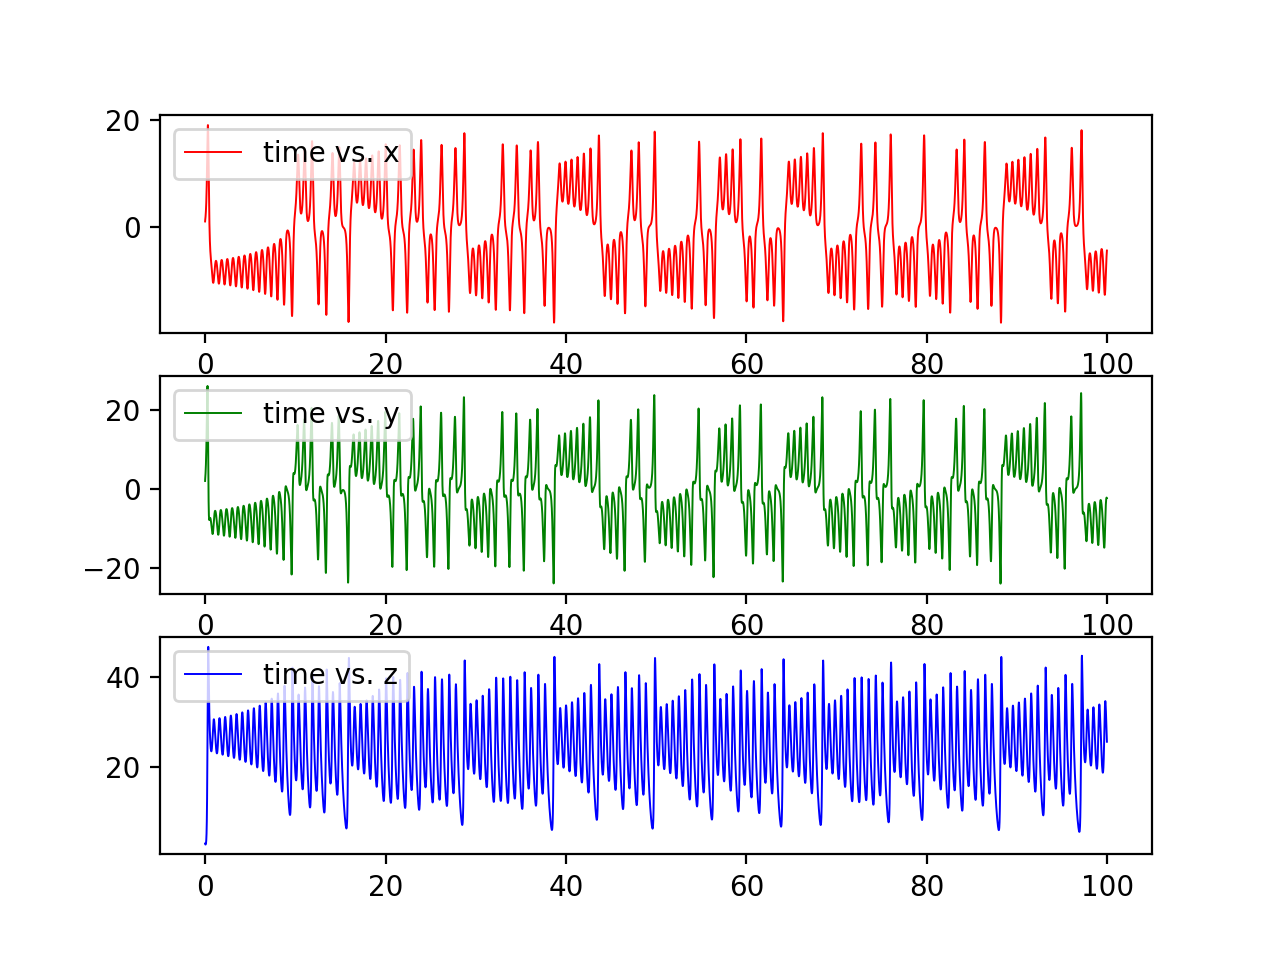

In [6]:
plt.figure()

plt.title("Time Step vs. x, y, z) ")
plt.ylabel('x, y, z')
plt.xlabel('Time (iteration/step)')

plt.subplot(311)
plt.plot(rk4_data_lorenz[:i, 3], rk4_data_lorenz[:i, 0], color='r', label="time vs. x", linewidth='0.7')
plt.legend()

plt.subplot(312)
plt.plot(rk4_data_lorenz[:i, 3], rk4_data_lorenz[:i, 1], color='g', label="time vs. y", linewidth='0.7')
plt.legend()

plt.subplot(313)
plt.plot(rk4_data_lorenz[:i, 3], rk4_data_lorenz[:i, 2], color='b', label="time vs. z", linewidth='0.7')
plt.legend()

plt.show()

---

# Part 2: Chen System

Summary: 3D model of the Chen system approximated using the 4th-order Runge-Kutta method.

---

In [7]:
x = 1
y = 1
z = 1

t0 = 0.
tf = 100.
dt = 0.01
tmax = 100.
vector_t = np.arange(t0, tmax, dt)
n = len(vector_t)

rho = 28.
sigma = 40.
beta = 3.

k1 = np.array([0., 0., 0.])
k2 = np.array([0., 0., 0.])
k3 = np.array([0., 0., 0.])
k4 = np.array([0., 0., 0.])


def equation_1(t, x, y, z):
    return sigma*(y - x)


def equation_2(t, x, y, z):
    return (rho - sigma)*x - x*z + rho*y


def equation_3(t, x, y, z):
    return x*y - beta*z

In [8]:
rk4_data_chen = np.zeros((n, 4))
rk4_data_chen[0, 0] = x
rk4_data_chen[0, 1] = y
rk4_data_chen[0, 2] = z
rk4_data_chen[0, 3] = vector_t[0]


for i in range(n - 1):
    rk4_data_chen[i+1, :] = RK4(vector_t[i], rk4_data_chen[i, 0], rk4_data_chen[i, 1],
                       rk4_data_chen[i, 2], equation_1, equation_2, equation_3, dt)
    

start = np.array([int(rk4_data_chen[0, 0]), int(rk4_data_chen[0, 1]), int(rk4_data_chen[0, 2])])


print('These are the initial conditions [x y z] = ', start)

These are the initial conditions [x y z] =  [1 1 1]


<IPython.core.display.Javascript object>


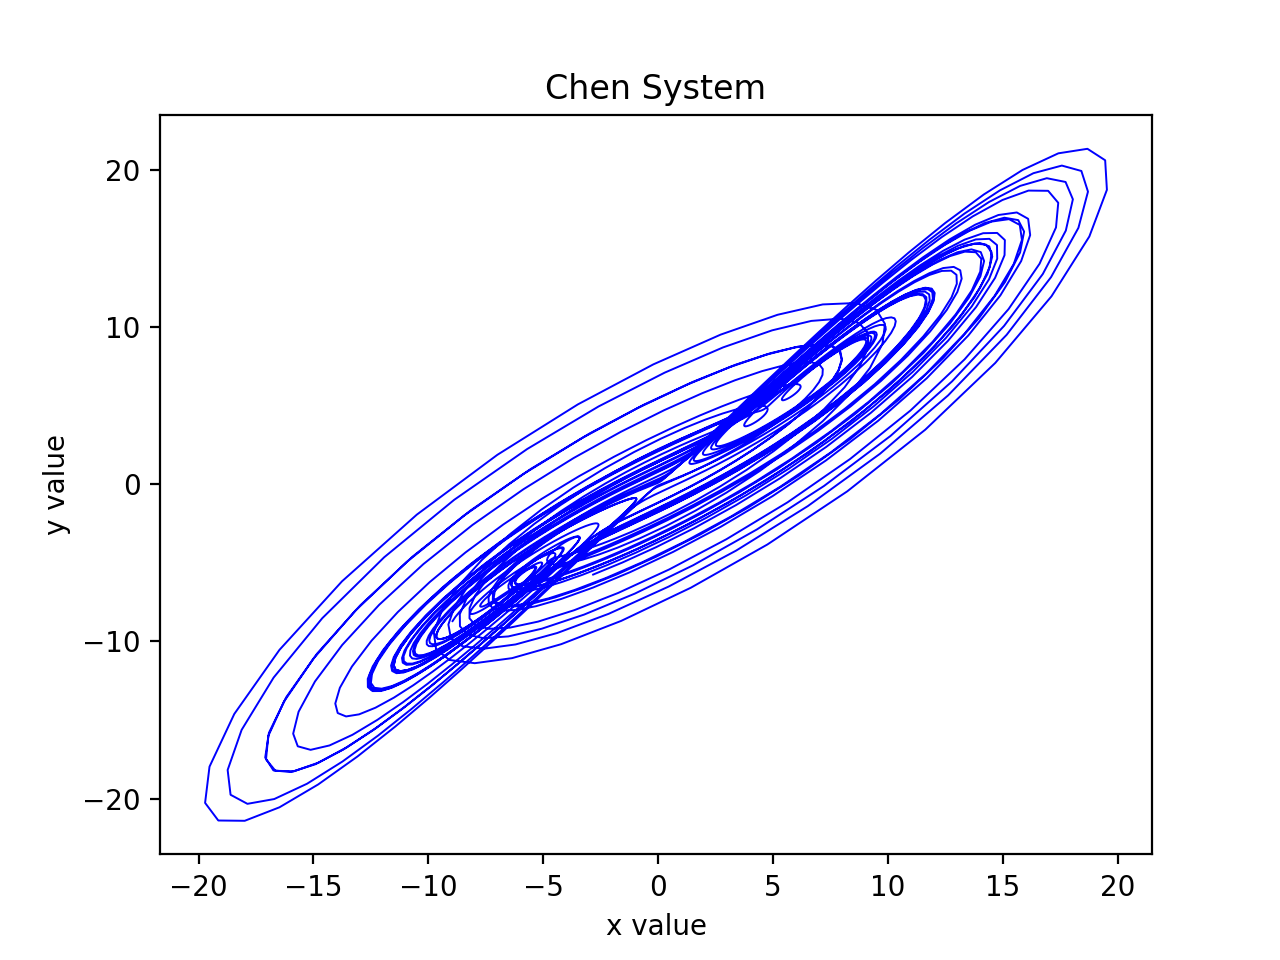

<IPython.core.display.Javascript object>


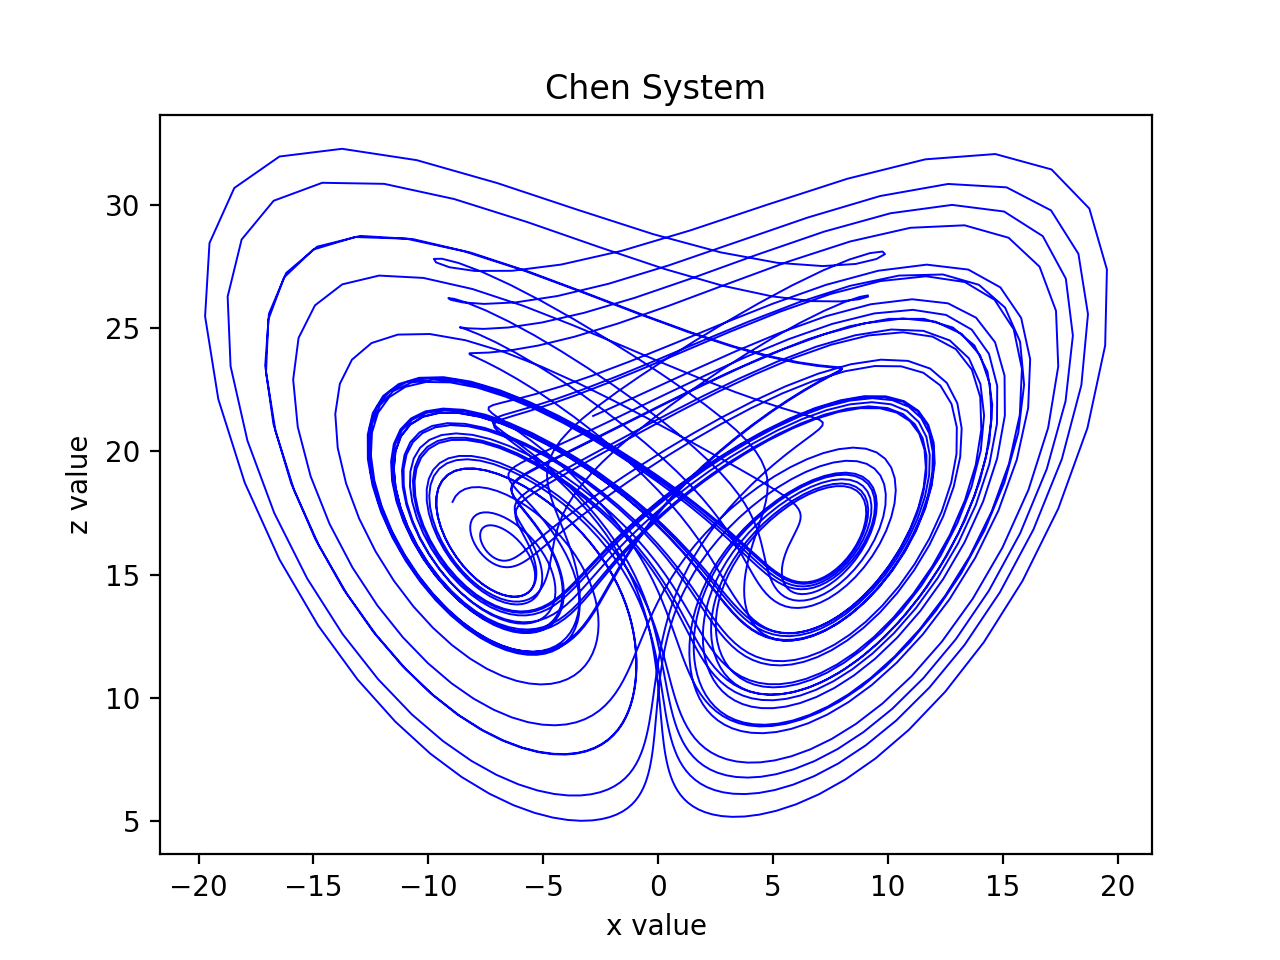

<IPython.core.display.Javascript object>


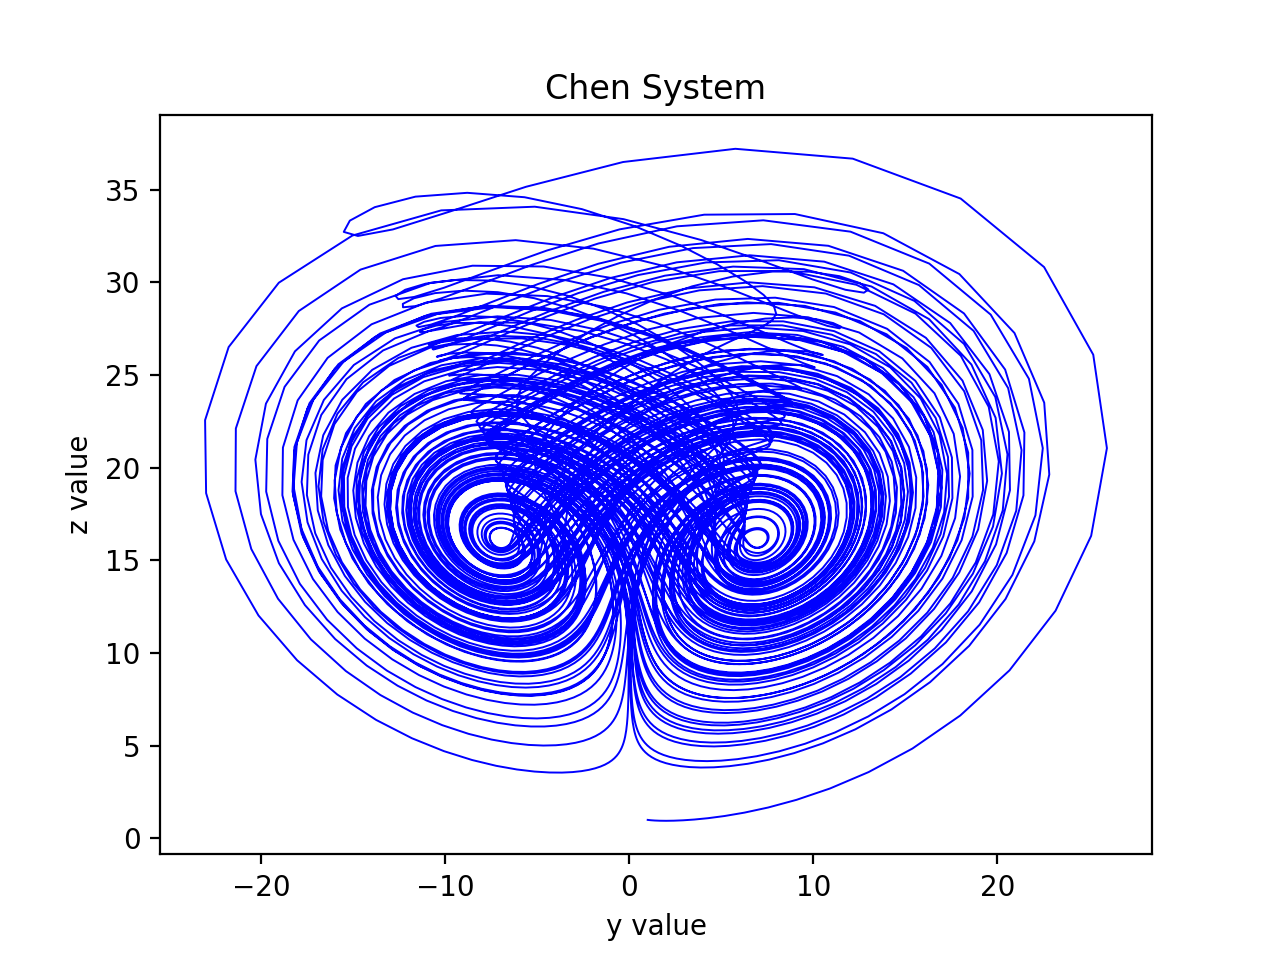

In [16]:
plt.figure()
plt.title("Chen System")
plt.ylabel('y value')
plt.xlabel('x value')
plt.plot(rk4_data_chen[7000:i, 0], rk4_data_chen[7000:i, 1], color='b', label='y vs. z', linewidth='0.7')
plt.show()


plt.figure() 
plt.title("Chen System")
plt.ylabel('z value')
plt.xlabel('x value')
plt.plot(rk4_data_chen[7000:i, 0], rk4_data_chen[7000:i, 2], color='b', label='y vs. z', linewidth='0.7')
plt.show()

plt.figure()
plt.title("Chen System")
plt.ylabel('z value')
plt.xlabel('y value')
plt.plot(rk4_data_chen[:i, 1], rk4_data_chen[:i, 2], color='b', label='y vs. z', linewidth='0.7')
plt.show()

<IPython.core.display.Javascript object>


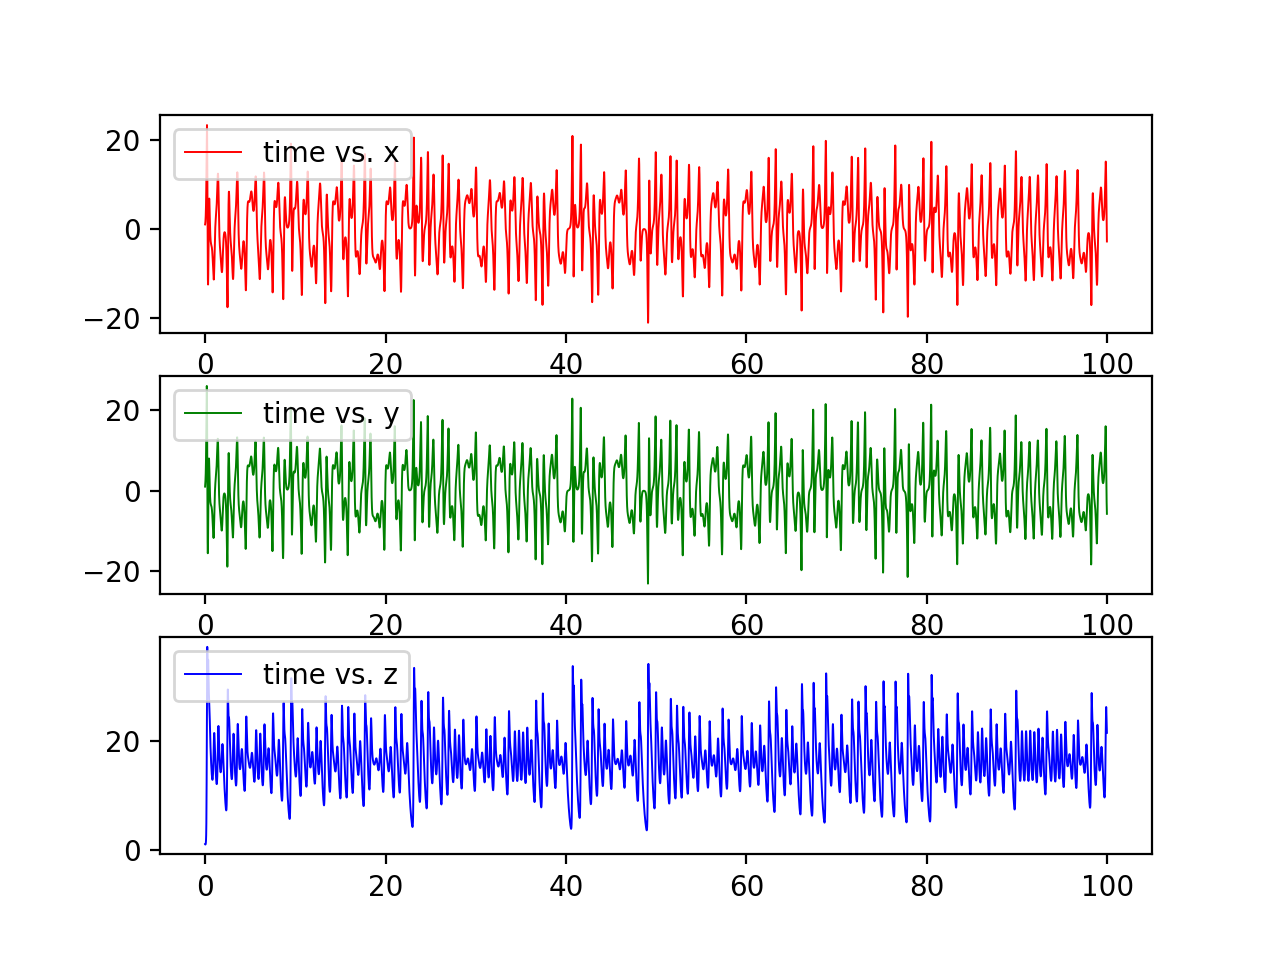

In [10]:
plt.figure()

plt.title("Time Step vs. x, y, z) ")
plt.ylabel('x, y, z')
plt.xlabel('Time (iteration/step)')

plt.subplot(311)
plt.plot(rk4_data_chen[:i, 3], rk4_data_chen[:i, 0], color='r', label="time vs. x", linewidth='0.7')
plt.legend()

plt.subplot(312)
plt.plot(rk4_data_chen[:i, 3], rk4_data_chen[:i, 1], color='g', label="time vs. y", linewidth='0.7')
plt.legend()

plt.subplot(313)
plt.plot(rk4_data_chen[:i, 3], rk4_data_chen[:i, 2], color='b', label="time vs. z", linewidth='0.7')
plt.legend()

plt.show()

## ---

# Part 3: Genesio System

Summary: 3D model of the Genesio system approximated using the 4th-order Runge-Kutta method.

---

In [11]:
x = 0.2
y = -0.3
z = 0.1

t0 = 0.
tf = 100.
dt = 0.01 
tmax = 100.
vector_t = np.arange(t0, tmax, dt)
n = len(vector_t)

rho = 1.
sigma = 1.
beta = 1.


k1 = np.array([0., 0., 0.])
k2 = np.array([0., 0., 0.])
k3 = np.array([0., 0., 0.])
k4 = np.array([0., 0., 0.])


def equation_1(t, x, y, z):
    return y


def equation_2(t, x, y, z):
    return z


def equation_3(t, x, y, z):
    return -rho*x - beta*y - sigma*z + x**2

In [12]:
rk4_data_genesio = np.zeros((n, 4))
rk4_data_genesio[0, 0] = x
rk4_data_genesio[0, 1] = y
rk4_data_genesio[0, 2] = z
rk4_data_genesio[0, 3] = vector_t[0]


for i in range(n - 1): 
    rk4_data_genesio[i+1, :] = RK4(vector_t[i], rk4_data_genesio[i, 0], rk4_data_genesio[i, 1],
                       rk4_data_genesio[i, 2], equation_1, equation_2, equation_3, dt)
    
    
start = np.array([float(rk4_data_genesio[0, 0]), float(rk4_data_genesio[0, 1]), float(rk4_data_genesio[0, 2])])


print('These are the initial conditions [x y z] = ', start)

These are the initial conditions [x y z] =  [ 0.2 -0.3  0.1]


#### Plots

<IPython.core.display.Javascript object>


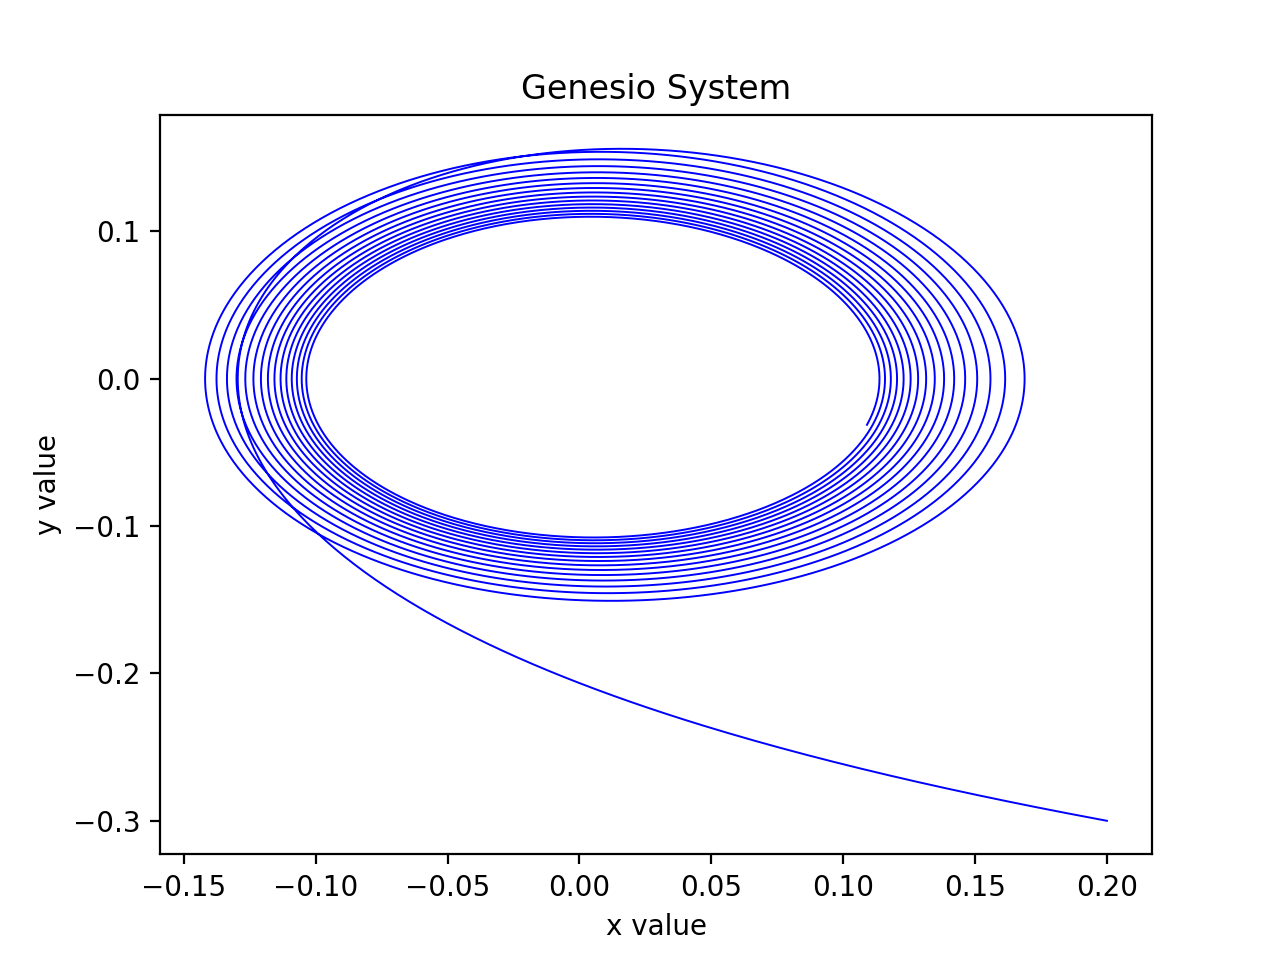

<IPython.core.display.Javascript object>


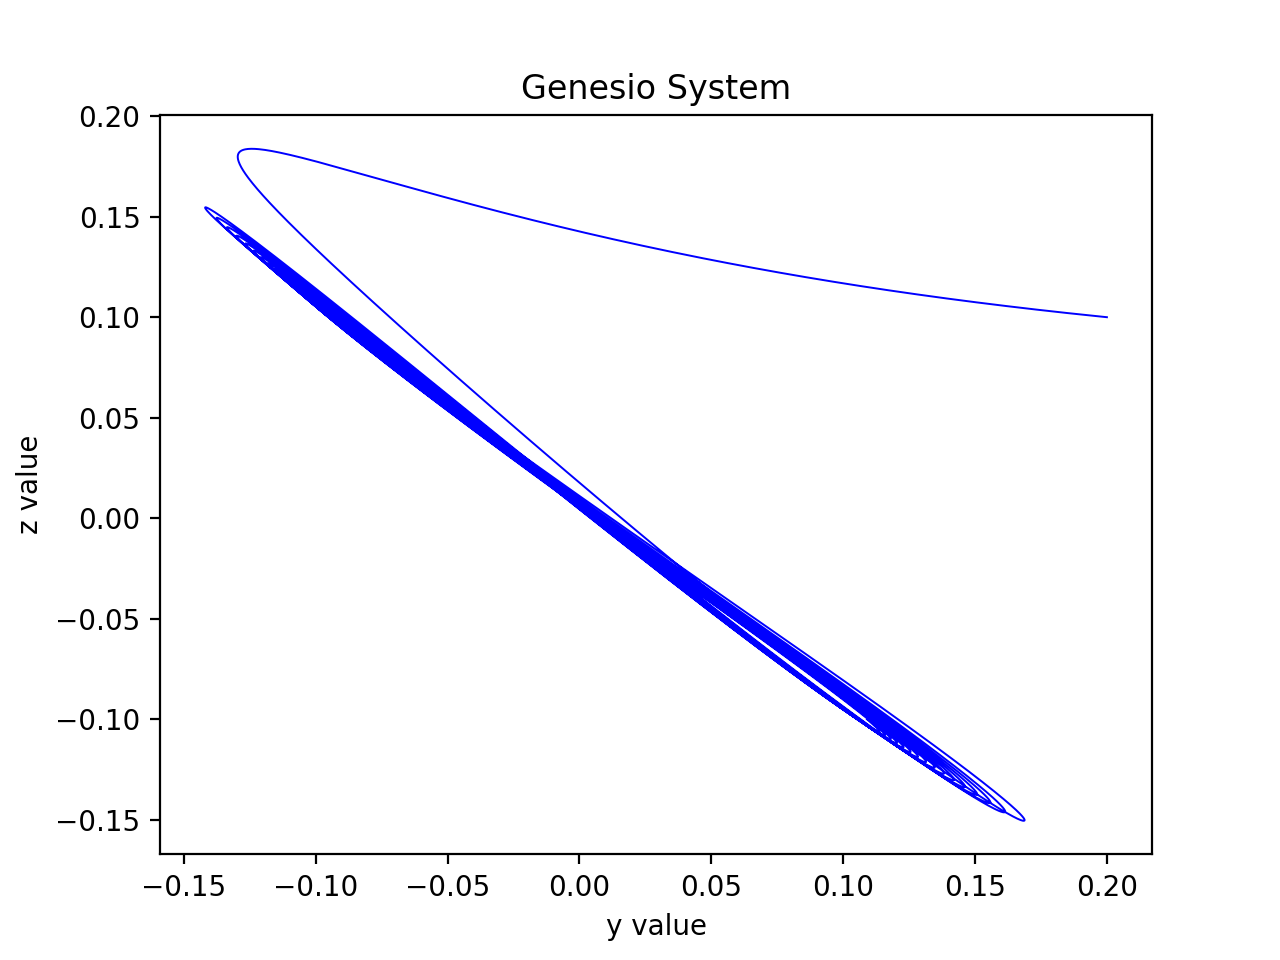

<IPython.core.display.Javascript object>


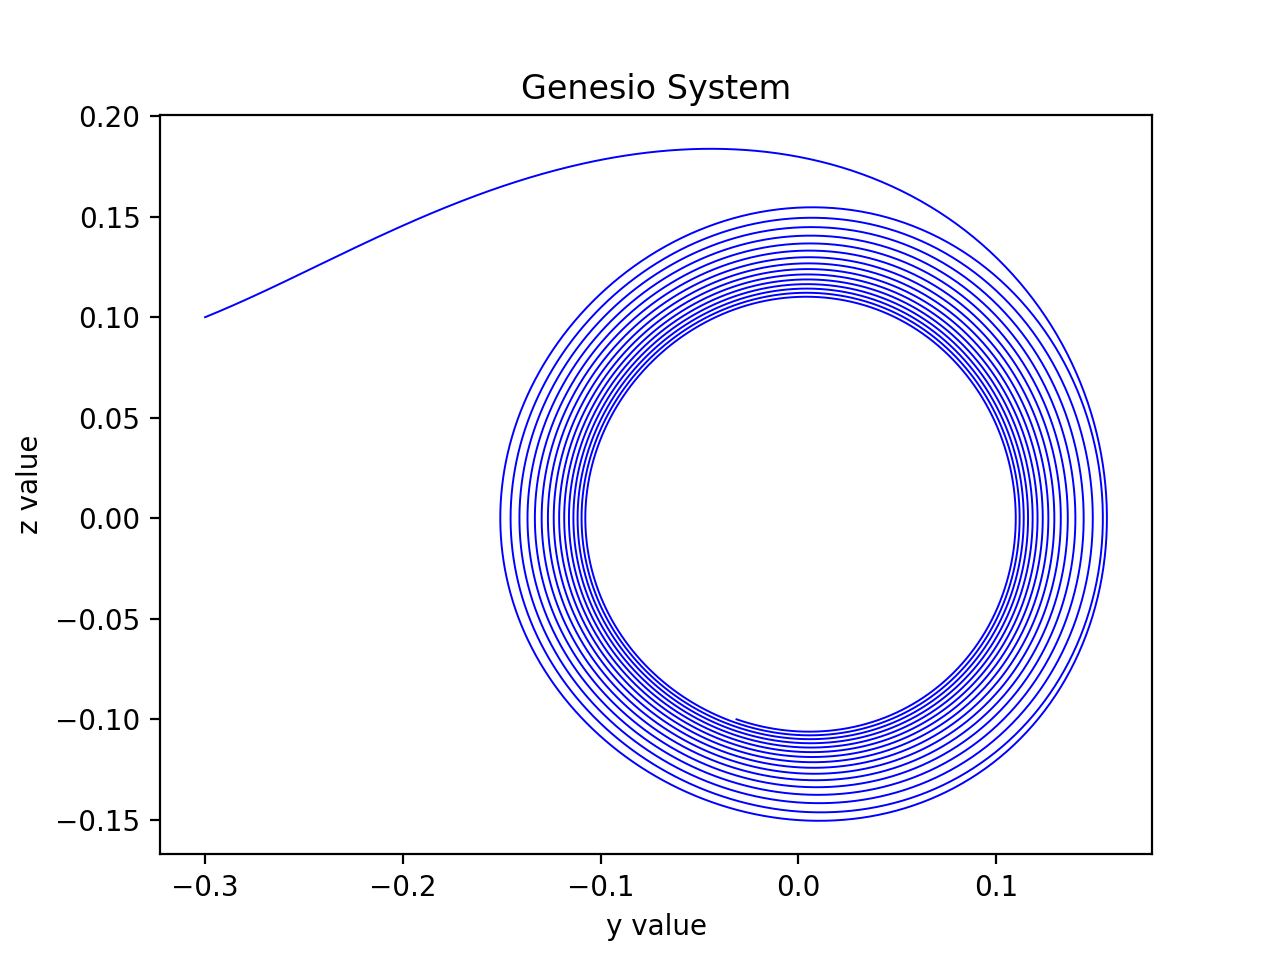

In [13]:
plt.figure()
plt.title("Genesio System")
plt.ylabel('y value')
plt.xlabel('x value')
plt.plot(rk4_data_genesio[:i, 0], rk4_data_genesio[:i, 1], color='b', label='x vs. y', linewidth='0.7')
plt.show()

plt.figure()
plt.title("Genesio System")
plt.ylabel('z value')
plt.xlabel('y value')
plt.plot(rk4_data_genesio[:i, 0], rk4_data_genesio[:i, 2], color='b', label='x vs. z', linewidth='0.7')
plt.show()

plt.figure()
plt.title("Genesio System")
plt.ylabel('z value')
plt.xlabel('y value')
plt.plot(rk4_data_genesio[:i, 1], rk4_data_genesio[:i, 2], color='b', label='y vs. z', linewidth='0.7')
plt.show()

#### Subplots

<IPython.core.display.Javascript object>


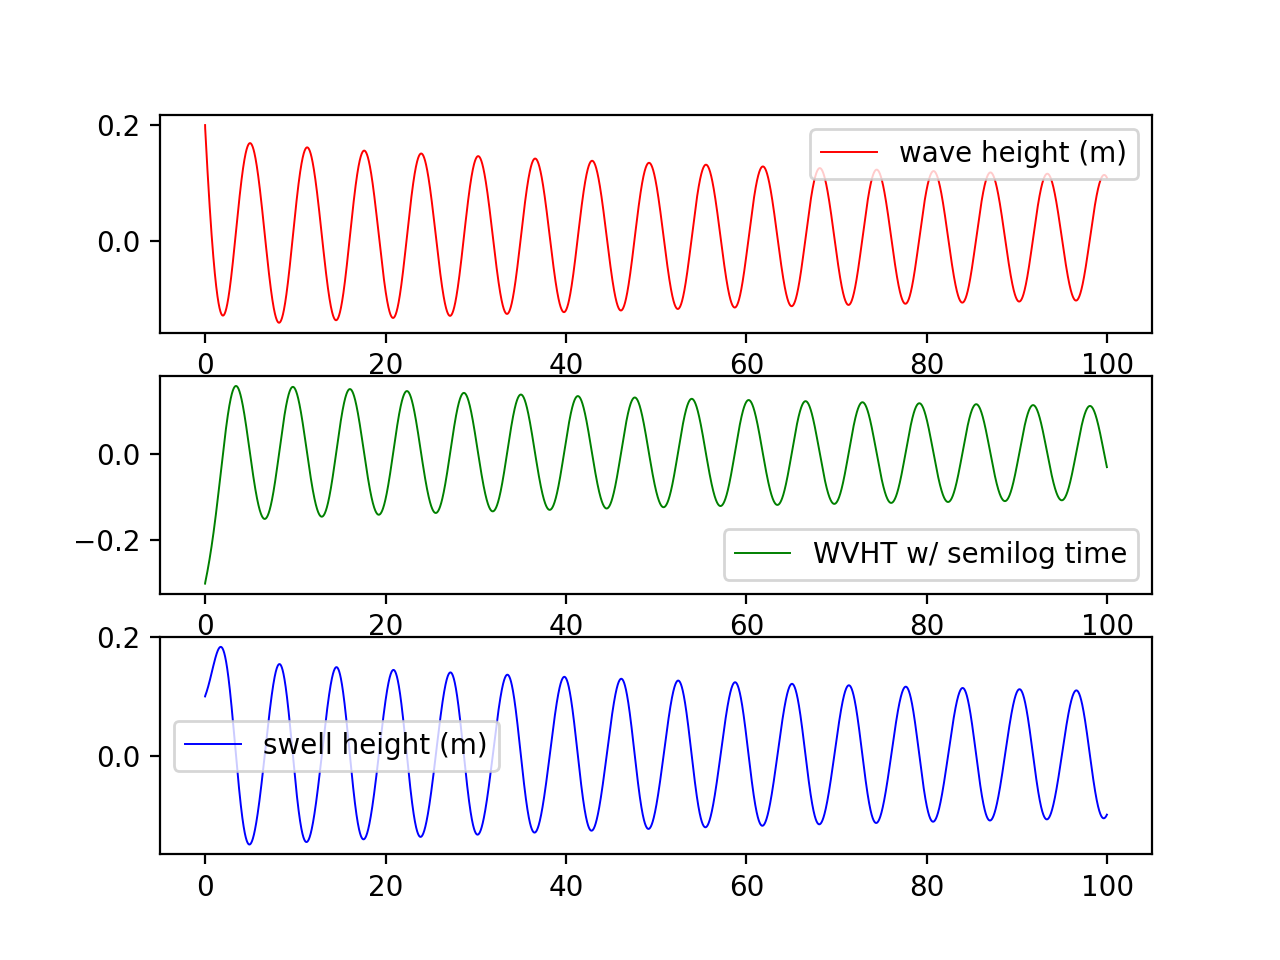

In [17]:
plt.figure()

plt.title("Time Step vs. x, y, z) ")
plt.ylabel('x, y, z')
plt.xlabel('Time (iteration/step)')

plt.subplot(311)
plt.plot(rk4_data_genesio[:i, 3], rk4_data_genesio[:i, 0], color='r', label="wave height (m)", linewidth='0.7')
plt.legend()

plt.subplot(312)
plt.plot(rk4_data_genesio[:i, 3], rk4_data_genesio[:i, 1], color='g', label="WVHT w/ semilog time", linewidth='0.7')
plt.legend()

plt.subplot(313)
plt.plot(rk4_data_genesio[:i, 3], rk4_data_genesio[:i, 2], color='b', label="swell height (m)", linewidth='0.7')
plt.legend()

plt.show()

---

---

---

## **NOTE:**

x = lorenz x-value

y = chen y-value

z = genesio z-value


<IPython.core.display.Javascript object>


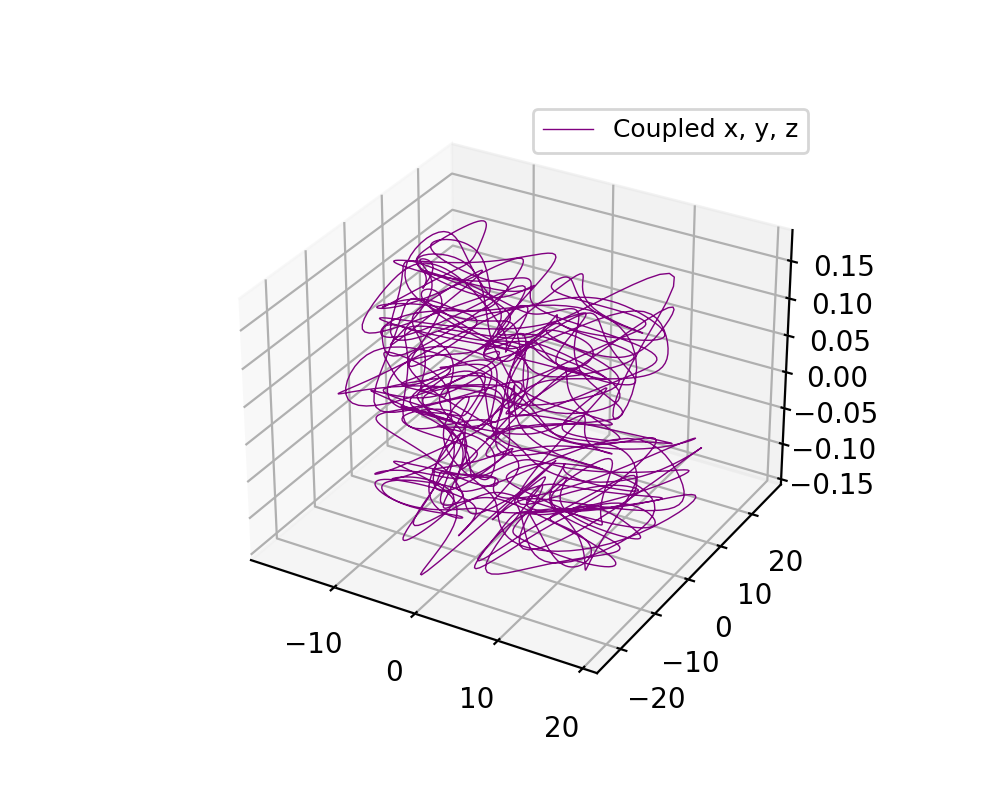

/var/folders/yy/tgnx4yvs65n5w70kcy3_2b000000gn/T/ipykernel_10757/3774952923.py:2: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


In [18]:
fig = plt.figure('Coupled Data', figsize=(5, 4), dpi=100)
ax = fig.gca(projection='3d')


def animate(i): # A function to call the animation
    ax.clear()
    ax.set(facecolor='white')
    
    ax.plot(rk4_data_lorenz[:i, 0], rk4_data_chen[:i, 1], rk4_data_genesio[:i, 2],
            color='purple', lw=0.5, label='Coupled x, y, z')
    
    ax.legend(fontsize=9)


ani = animation.FuncAnimation(
    fig, animate, np.arange(6000), interval=1, repeat=False) # anim object; 3,000 frames, 5ms delay, no repeat
plt.show()

### Links:

List of chaotic maps - https://en.wikipedia.org/wiki/List_of_chaotic_maps

legendre -  https://numpy.org/doc/stable/reference/generated/numpy.polynomial.laguerre.laggauss.html#numpy.polynomial.laguerre.laggauss

legendre wiki - https://en.wikipedia.org/wiki/Legendre_polynomials

gaussian quad wiki - https://en.wikipedia.org/wiki/Gaussian_quadrature

wolfram legendre - https://mathworld.wolfram.com/Legendre-GaussQuadrature.html

### References:

[1] - https://www.sciencedirect.com/science/article/pii/S1026309812001848

[2] - https://www.sciencedirect.com/science/article/pii/S0960077905000676

[3] - https://www.hindawi.com/journals/isrn/2012/843962/

[4] - https://arxiv.org/pdf/1804.06501.pdf